In [956]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage, cophenet, dendrogram

np.set_printoptions(suppress=True)   # To avoid number in exp form

from sklearn.metrics.pairwise import euclidean_distances

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Data Exploration

In [957]:
data=pd.read_csv('Country-data.csv')

In [958]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [959]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [960]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


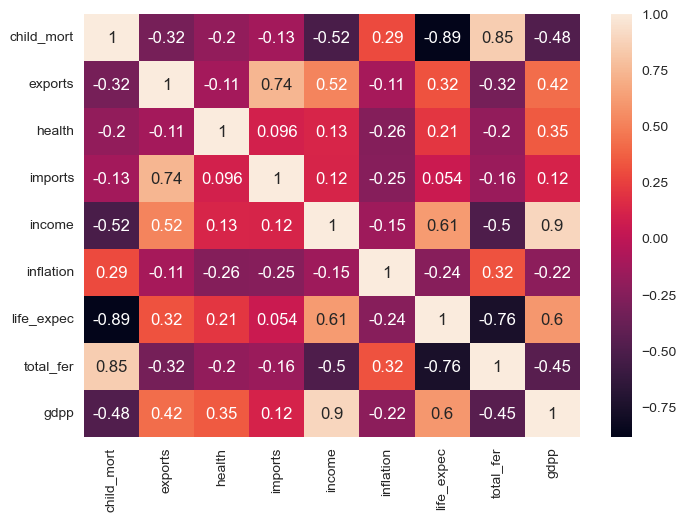

In [961]:
sns.heatmap(data.select_dtypes(include=np.number).corr(),annot=True)
plt.show()

In [962]:
# sns.pairplot(data)

### Let's reduce this data using PCA

In [963]:
df=data.copy()

In [964]:
del df['country']

In [965]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [966]:
sc=StandardScaler()

In [967]:
df_s=pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [968]:
df_s

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [969]:
pca=PCA(n_components=9)

In [970]:
pca_data=pca.fit_transform(df_s)
pca_data

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [971]:
pca.explained_variance_

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

In [972]:
# Lets reduce the data with pca =5

In [973]:
pca=PCA(n_components=5)

In [974]:
pca_data=pd.DataFrame(pca.fit_transform(df_s),columns=['PC1','PC2','PC3','PC4','PC5'])

In [975]:
pca_data

,PC1,PC2,PC3,PC4,PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581
164,0.498524,1.390744,-0.238526,-1.074098,1.176081
165,-1.887451,-0.109453,1.109752,0.056257,0.618365


### Eigen Values

In [976]:
pca.explained_variance_     # Eigen value

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866])

In [977]:
pca.components_.T     # Eigen Vector

array([[-0.41951945,  0.19288394, -0.02954353,  0.37065326, -0.16896968],
       [ 0.28389698,  0.61316349,  0.14476069,  0.00309102,  0.05761584],
       [ 0.15083782, -0.24308678, -0.59663237,  0.4618975 ,  0.51800037],
       [ 0.16148244,  0.67182064, -0.29992674, -0.07190746,  0.25537642],
       [ 0.39844111,  0.02253553,  0.3015475 ,  0.39215904, -0.2471496 ],
       [-0.19317293, -0.00840447,  0.64251951,  0.15044176,  0.7148691 ],
       [ 0.42583938, -0.22270674,  0.11391854, -0.20379723,  0.1082198 ],
       [-0.40372896,  0.15523311,  0.01954925,  0.37830365, -0.13526221],
       [ 0.39264482, -0.0460224 ,  0.12297749,  0.53199457, -0.18016662]])

In [978]:
# Explained variance Ratio
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211])

In [979]:
np.cumsum(pca.explained_variance_ratio_)

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998])

### K_mean Clustering on data

In [980]:
# Identift the value of K
k_elbow=KElbowVisualizer(KMeans(),k=10)

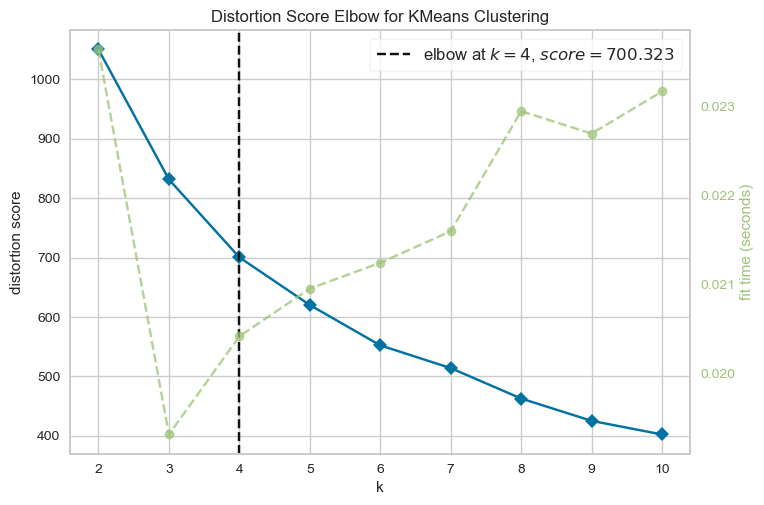

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [981]:
k_elbow.fit(df_s)
k_elbow.show()

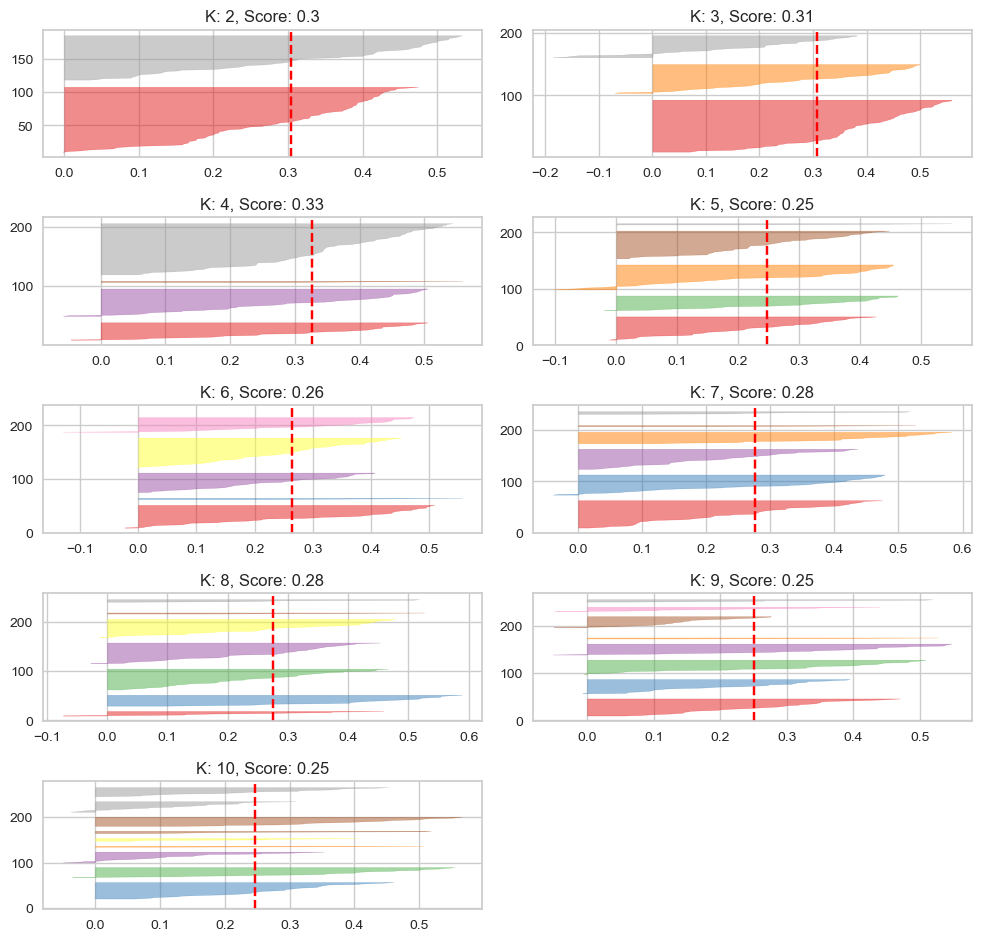

In [982]:
# Better way to visualize the silhouette score is by using yellow brick

t=1
plt.figure(figsize=(10,15))
for i in range(2,11):
    plt.subplot(8,2,t)
    model=KMeans(n_clusters=i)
    sil_viz=SilhouetteVisualizer(model)
    sil_viz.fit(pca_data)
    plt.title(f'K: {i}, Score: {np.round(sil_viz.silhouette_score_,2)}')
    t+=1
plt.tight_layout()
plt.show()

### Letsgo with k = 3

In [983]:
final_kmeans=KMeans(n_clusters=3)

In [984]:
data['Class']=final_kmeans.fit_predict(pca_data)

In [985]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


In [986]:
centroids=final_kmeans.cluster_centers_
centroids

array([[ 0.17518237, -0.13882672,  0.02428483, -0.75851441,  0.15553189],
       [ 2.76977273, -0.21301421,  0.06888632,  0.86680107, -0.17822588],
       [-2.43461995,  0.41127566, -0.09616666,  0.69171004, -0.14145844]])

#### Visualize the pc's

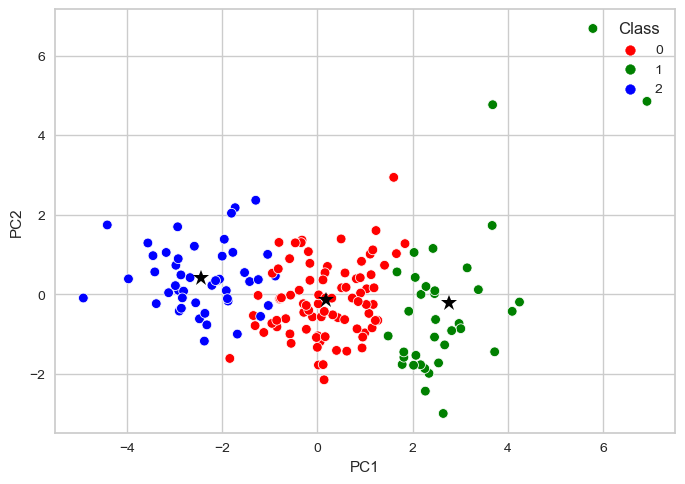

In [987]:
sns.scatterplot(x=pca_data['PC1'],y=pca_data['PC2'],hue=data['Class'],\
                palette=['red','green','blue','orange'])
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],color='black',marker='*',ms=12)
plt.show()

### Explore these classes

In [988]:
data[data['Class']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,1
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1


In [989]:
# Let's assing categories to these labels
# 0 --> Average
# 1 --> Rich
# 2 --> Poor
data['Class']=data['Class'].map({0:'Average',1:'Rich',2:'Poor'})

In [990]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Poor
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Average
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Average
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Poor
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Average
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Average
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Average
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Average
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Poor


In [991]:
# Let's show these country on world map

In [992]:
import plotly.express as px

In [993]:
fig=px.choropleth(data_frame=data[['country','Class']],locationmode='country names',locations='country',color=data['Class']\
                  ,color_discrete_map={'Rich':'green','Average':'yellow','Poor':'red'})
fig.show()